<a href="https://colab.research.google.com/github/alexiaddiaz0907/DSC410/blob/master/DSC410_week3_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

#import data
from google.colab import files
uploaded = files.upload()


data = pd.read_csv(io.BytesIO(uploaded['AutoInsurance.csv']))
# Dataset is now stored in a Pandas Dataframe

#Confirm data import successful 
print(data)



Saving AutoInsurance.csv to AutoInsurance.csv
     Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0   

** Exploratory Data Analysis & Feature Engineering - Milestone 1 & 2 **

In [2]:
#name of all the Columns in the dataframe
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [3]:
data.shape

(9134, 24)

In [4]:
#Check the type of each column
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
#Gives the sum of the null values for each column
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [6]:
#Confirmed no missing values 
data.count()

Customer                         9134
State                            9134
Customer Lifetime Value          9134
Response                         9134
Coverage                         9134
Education                        9134
Effective To Date                9134
EmploymentStatus                 9134
Gender                           9134
Income                           9134
Location Code                    9134
Marital Status                   9134
Monthly Premium Auto             9134
Months Since Last Claim          9134
Months Since Policy Inception    9134
Number of Open Complaints        9134
Number of Policies               9134
Policy Type                      9134
Policy                           9134
Renew Offer Type                 9134
Sales Channel                    9134
Total Claim Amount               9134
Vehicle Class                    9134
Vehicle Size                     9134
dtype: int64

In [7]:
#Check for duplicates in the data
data.duplicated()



0       False
1       False
2       False
3       False
4       False
        ...  
9129    False
9130    False
9131    False
9132    False
9133    False
Length: 9134, dtype: bool

In [8]:
data[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']].describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
#Check data types of Numerical Values 
numerical_values = data[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']]

#Converting data types to from float64 to int64
data['Customer Lifetime Value'] = data['Customer Lifetime Value'].astype(int)
data['Total Claim Amount'] = data['Total Claim Amount'].astype(int)

#Confirm data types are changed
numerical_values.dtypes


Customer Lifetime Value          float64
Income                             int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Total Claim Amount               float64
dtype: object

**Change Category data to numerical **

In [10]:
# Changing Category data to numerical
data['Gender'] = data['Gender'].map({'F': 1, 'M': 0})

# Display modified DataFrame
print(data['Gender'])

0       1
1       1
2       1
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: Gender, Length: 9134, dtype: int64


In [11]:
# Changing Category data to numerical
data['Coverage'] = data['Coverage'].map({'Premium':1, 'Basic':0,'Extended':2})

# Display modified DataFrame
print(data['Coverage'])


0       0
1       2
2       1
3       0
4       0
       ..
9129    0
9130    2
9131    2
9132    2
9133    2
Name: Coverage, Length: 9134, dtype: int64


In [12]:
# Changing Category data to numerical
data['Location Code'] = data['Location Code'].map({'Suburban': 1, 'Urban': 0, 'Rural':2})

# Display modified DataFrame
print(data['Location Code'])

0       1
1       1
2       1
3       1
4       2
       ..
9129    0
9130    1
9131    1
9132    1
9133    1
Name: Location Code, Length: 9134, dtype: int64


In [13]:
#Changing states to numbers 

data['State'] = pd.factorize(data['State'])[0] + 1
print(data['State'])


0       1
1       2
2       3
3       4
4       1
       ..
9129    4
9130    4
9131    4
9132    4
9133    4
Name: State, Length: 9134, dtype: int64


In [14]:
# Changing Category data to numerical
data['Marital Status'] = data['Marital Status'].map({'Married': 1, 'Single': 0, 'Divorced':2})

# Display modified DataFrame
print(data['Marital Status'])

0       1
1       0
2       1
3       1
4       0
       ..
9129    1
9130    2
9131    0
9132    1
9133    0
Name: Marital Status, Length: 9134, dtype: int64


In [15]:
# Changing Category data to numerical
data['Policy Type'] = data['Policy Type'].map({'Corporate Auto': 1, 'Personal Auto': 0, 'Special Auto':2})

# Display modified DataFrame
print(data['Policy Type'])

0       1
1       0
2       0
3       1
4       0
       ..
9129    0
9130    1
9131    1
9132    0
9133    1
Name: Policy Type, Length: 9134, dtype: int64


In [16]:
# Changing Category data to numerical
data[['Response', 'EmploymentStatus', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size','Education']] = data[['Response', 'EmploymentStatus', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size','Education']].apply(lambda x: pd.factorize(x)[0])

# Display modified DataFrame
#print(data)

#data.dtypes

#Converting data types to from float64 to int64
#data['Customer Lifetime Value'] = data['Customer Lifetime Value'].astype(int)
#data['Total Claim Amount'] = data['Total Claim Amount'].astype(int)


In [17]:
data.drop(['Effective To Date','Customer'],axis=1, inplace=True)
data.head()


,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,2763,0,0,0,0,1,56274,1,1,...,5,0,1,1,0,0,0,384,0,0
1,2,6979,0,2,0,1,1,0,1,0,...,42,0,8,0,1,1,0,1131,1,0
2,3,12887,0,1,0,0,1,48767,1,1,...,38,0,2,0,1,0,0,566,0,0
3,4,7645,0,0,0,1,0,0,1,1,...,65,0,7,1,2,0,1,529,2,0
4,1,2813,0,0,0,0,0,43836,2,0,...,44,0,1,0,3,0,0,138,1,0


In [18]:
data.dtypes

State                            int64
Customer Lifetime Value          int64
Response                         int64
Coverage                         int64
Education                        int64
EmploymentStatus                 int64
Gender                           int64
Income                           int64
Location Code                    int64
Marital Status                   int64
Monthly Premium Auto             int64
Months Since Last Claim          int64
Months Since Policy Inception    int64
Number of Open Complaints        int64
Number of Policies               int64
Policy Type                      int64
Policy                           int64
Renew Offer Type                 int64
Sales Channel                    int64
Total Claim Amount               int64
Vehicle Class                    int64
Vehicle Size                     int64
dtype: object

**Outlier Detection**

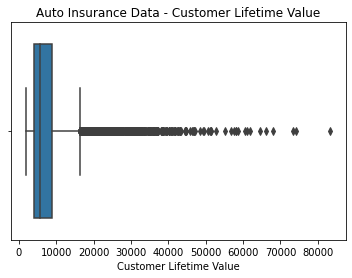

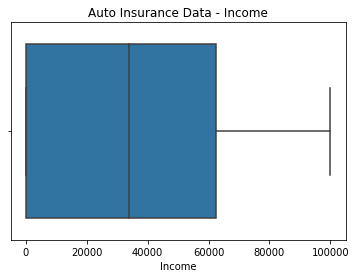

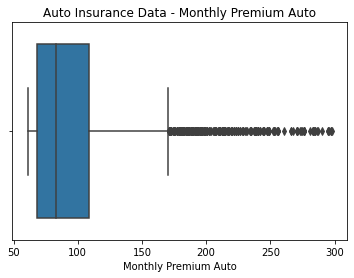

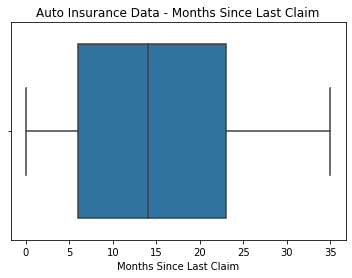

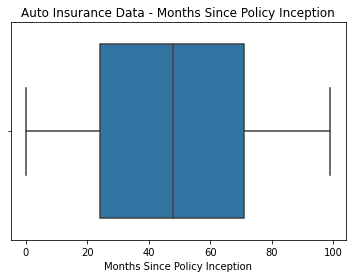

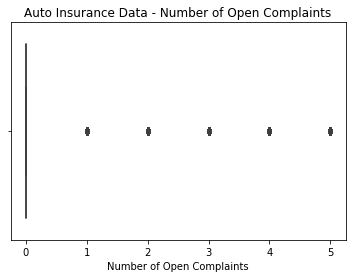

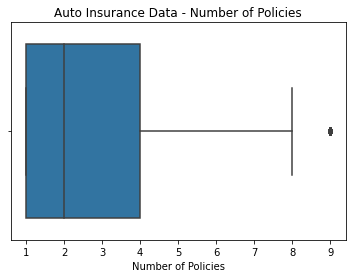

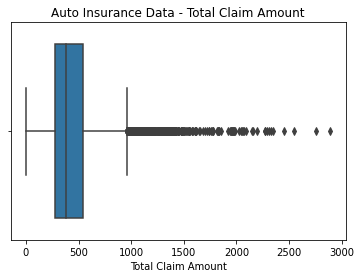

In [ ]:
def boxplot(column):
    sns.boxplot(data=data,x=data[f"{column}"])
    plt.title(f"Auto Insurance Data - {column}")
    plt.show()

boxplot('Customer Lifetime Value')
boxplot('Income')
boxplot('Monthly Premium Auto')
boxplot('Months Since Last Claim')
boxplot('Months Since Policy Inception')
boxplot('Number of Open Complaints')
boxplot('Number of Policies')
boxplot('Total Claim Amount')


**Remove Outliners **

In [28]:

factor = 2
upper_lim = data['Customer Lifetime Value'].mean () + data['Customer Lifetime Value'].std () * factor
lower_lim = data['Customer Lifetime Value'].mean () - data['Customer Lifetime Value'].std () * factor

no_outliers = data[(data['Customer Lifetime Value'] < upper_lim) & (data['Customer Lifetime Value'] > lower_lim)]
no_outliers
dataframe = no_outliers
dataframe.shape

(8659, 22)

In [29]:
factor = 2
upper_lim = dataframe['Monthly Premium Auto'].mean () + dataframe['Monthly Premium Auto'].std () * factor
lower_lim = dataframe['Monthly Premium Auto'].mean () - dataframe['Monthly Premium Auto'].std () * factor

no_outliers = dataframe[(dataframe['Monthly Premium Auto'] < upper_lim) & (dataframe['Monthly Premium Auto'] > lower_lim)]
no_outliers
dataframe_2 = no_outliers
dataframe_2.shape


(8266, 22)

In [30]:
factor = 2
upper_lim = dataframe_2['Total Claim Amount'].mean () + dataframe_2['Total Claim Amount'].std () * factor
lower_lim = dataframe_2['Total Claim Amount'].mean () - dataframe_2['Total Claim Amount'].std () * factor

no_outliers = dataframe_2[(dataframe_2['Total Claim Amount'] < upper_lim) & (dataframe_2['Total Claim Amount'] > lower_lim)]
no_outliers
dataframe_3 = no_outliers
dataframe_3.shape

(7975, 22)

**Determine Correlation**

In [31]:
cor_matrix = dataframe_3.corr().abs()
print(cor_matrix)

                                  State  Customer Lifetime Value  Response  \
State                          1.000000                 0.024364  0.000129   
Customer Lifetime Value        0.024364                 1.000000  0.006452   
Response                       0.000129                 0.006452  1.000000   
Coverage                       0.001886                 0.126943  0.005966   
Education                      0.013918                 0.015946  0.014234   
EmploymentStatus               0.006190                 0.033433  0.192249   
Gender                         0.000228                 0.011607  0.011045   
Income                         0.005206                 0.039555  0.010034   
Location Code                  0.006047                 0.005073  0.001301   
Marital Status                 0.002808                 0.037043  0.076329   
Monthly Premium Auto           0.018628                 0.317961  0.044005   
Months Since Last Claim        0.012620                 0.000587

In [32]:
  lower_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=0).astype(np.bool))
  print(lower_tri)

                               State  Customer Lifetime Value  Response  \
State                            1.0                 0.024364  0.000129   
Customer Lifetime Value          NaN                 1.000000  0.006452   
Response                         NaN                      NaN  1.000000   
Coverage                         NaN                      NaN       NaN   
Education                        NaN                      NaN       NaN   
EmploymentStatus                 NaN                      NaN       NaN   
Gender                           NaN                      NaN       NaN   
Income                           NaN                      NaN       NaN   
Location Code                    NaN                      NaN       NaN   
Marital Status                   NaN                      NaN       NaN   
Monthly Premium Auto             NaN                      NaN       NaN   
Months Since Last Claim          NaN                      NaN       NaN   
Months Since Policy Incep

<ipython-input-32-d710e67b5b9a>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lower_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=0).astype(np.bool))


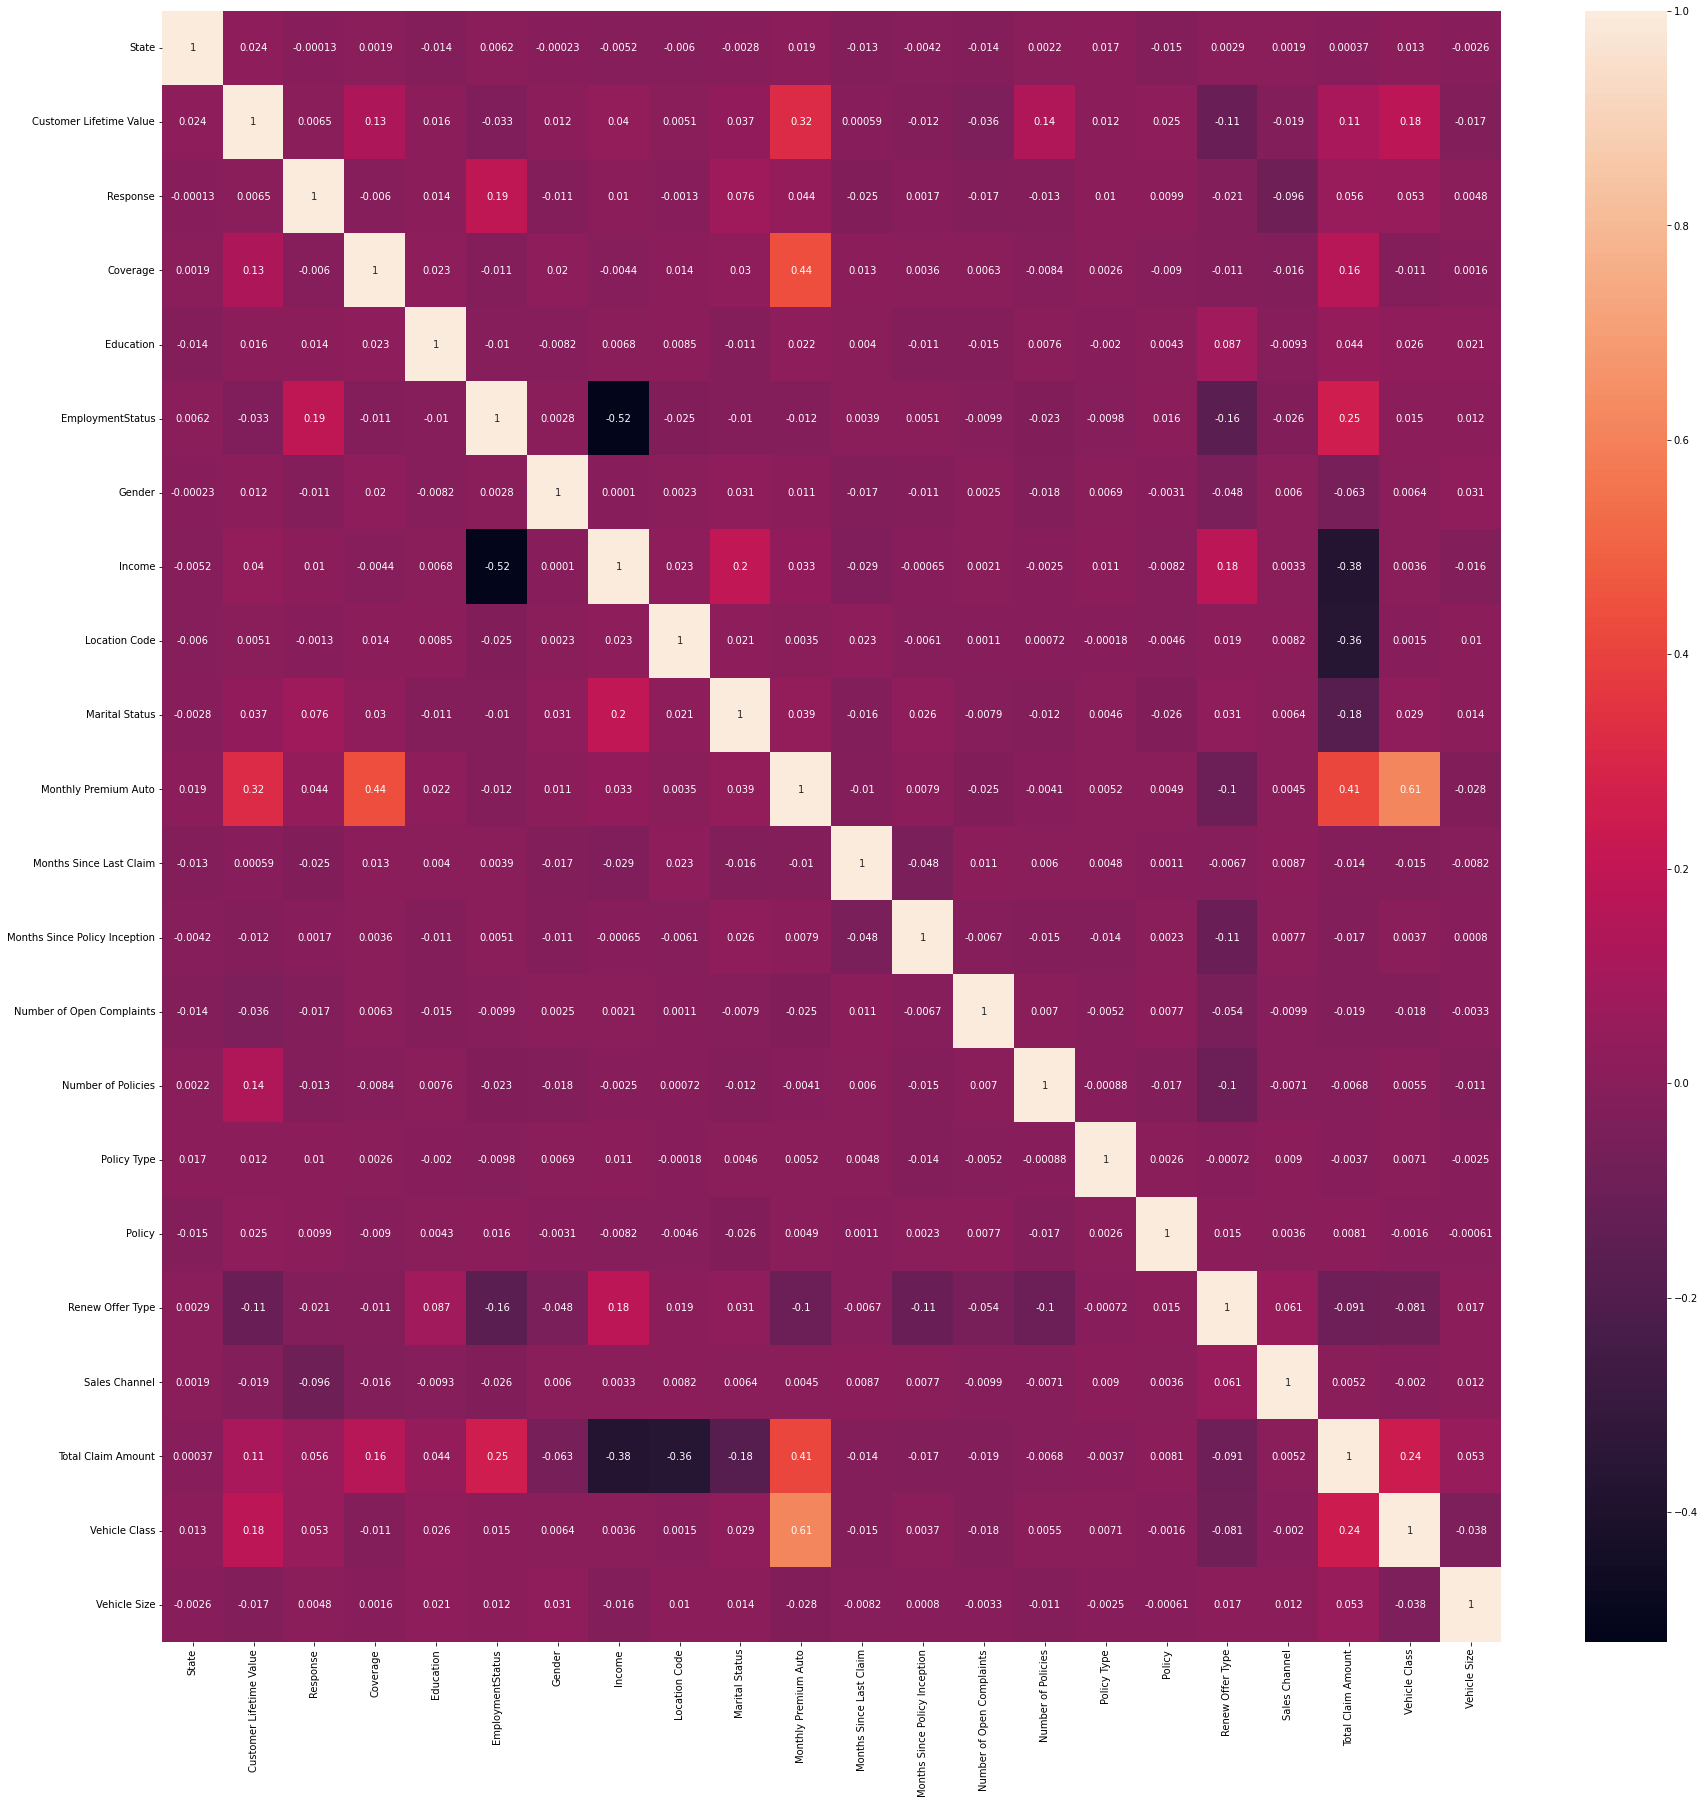

In [33]:
#Plot corrlation matrix for better understanding
plt.figure(figsize=(30,30))
sns.heatmap(dataframe_3.corr(), annot=True)

**Compare Variables & Correlation **

Text(0, 0.5, 'Monthly Premium Auto')

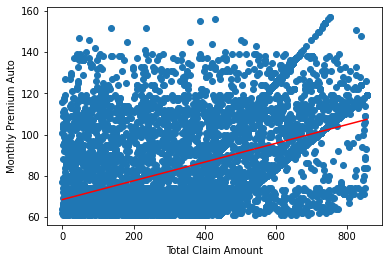

In [35]:
x = dataframe_3['Total Claim Amount']
y = dataframe_3['Monthly Premium Auto']

# plotting the data
plt.scatter(x, y)
 
# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

 
# Labelling axes
plt.xlabel('Total Claim Amount')
plt.ylabel('Monthly Premium Auto')

Text(0, 0.5, 'Vehicle Class')

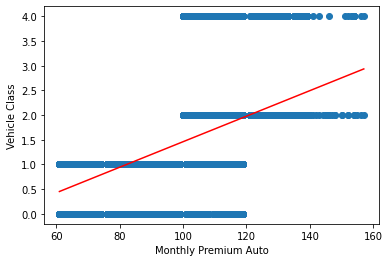

In [37]:
y = dataframe_3['Vehicle Class']
x = dataframe_3['Monthly Premium Auto']

# plotting the data
plt.scatter(x, y)
 
# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

# Labelling axes
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Vehicle Class')

#Vehicle Class Code
#data['Vehicle Class'].head

Text(0, 0.5, 'Customer Lifetime Value')

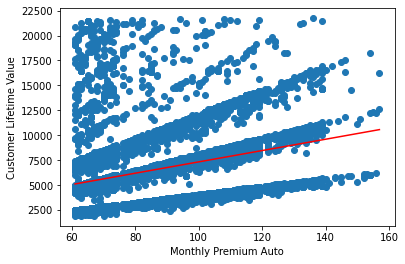

In [38]:
y= dataframe_3['Customer Lifetime Value']
x = dataframe_3['Monthly Premium Auto']

# plotting the data
plt.scatter(x, y)
 
# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

# Labelling axes
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Customer Lifetime Value')


Text(0.5, 0, 'Monthly Premium Auto')

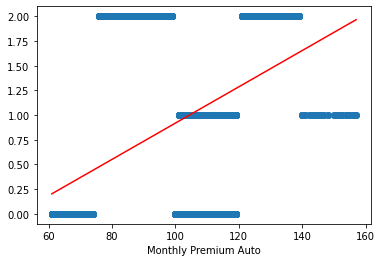

In [39]:
y = dataframe_3['Coverage']
x = dataframe_3['Monthly Premium Auto']


# plotting the data
plt.scatter(x, y)
 
# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

# Labelling axes
plt.xlabel('Coverage')
plt.xlabel('Monthly Premium Auto')